# Data Cleaning and Project Definition

## Project Title: Understanding graduation rates to student success and professional development

### Team Number: 11
### Team Members: 
- Pranava Kadiyala (pskadiya@andrew.cmu.edu)
- Matthew Wu (mrw2@andrew.cmu.edu)
- Hiba Hassan (hibah@andrew.cmu.edu)

### Outline
1. Overview
2. Data Setup and Data Cleaning
    - Null/Negative Values
    - Numerical Variables
    - Categorical Variables
3. Data Visualization
4. Classification/Prediction Variables 
5. Question Definition
6. Pre-liminary Test

In [1]:
#Importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.metrics import r2_score 
import time
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

%matplotlib inline

## Overview
Machine learning models and tools have transformed how the public policy realm is impacted by identifying the complex relationships that persist within such domains. The project seeks to utilize such models and techniques to tap into and impact the human development realm of policy making, specifically through education.

Details:
- Who: High School Students
- Where: United States of America
- When: Panel Data Collected: 2009 (When students were in 9th Grade) to 2016 (When students are potentially in final year of  university)

- Data retrieved from National Center for Education Statistics: 'High School Longitudinal Study of 2009' (https://nces.ed.gov/datalab/onlinecodebook)

---
## Data Setup and Data Cleaning

### Data Summary

In [2]:
#Importing the relevant csv data file
df = pd.read_csv("data/hsls_17_students_trim2.csv")
df.head()

,STU_ID,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,X4UNIV1,W1STUDENT,W2STUDENT,W3STUDENT,W4STUDENT,...,S2MUSIC,S2ART,S2DRAMA,S2SPORTS,S2CLUB,S2ACADEMIC,S3HSCRED,S3FOCUS,S3CLGFT,S3WORKFT
0,10001,11,1,1,1111,11111,375.667105,365.607062,392.215779,466.860846,...,0,1,0,1,1,0,1,1,1,-7
1,10002,11,1,1,1111,11111,189.309446,196.338045,236.571468,254.811585,...,1,0,0,0,0,0,1,1,1,2
2,10003,11,1,1,1111,11111,143.591863,137.678887,148.736833,156.626153,...,0,0,0,1,0,0,1,1,1,2
3,10004,10,1,7,1001,10011,227.937019,0.000000,0.000000,329.138365,...,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
4,10005,11,1,1,1111,11111,145.019401,134.566242,152.708389,148.440875,...,1,1,0,0,0,0,1,-9,3,3


In [3]:
#Initial data structure
df.shape

(23503, 272)

In [4]:
pd.options.display.max_rows = 1000
df.isnull().sum()

STU_ID              0
X2UNIV1             0
X2UNIV2A            0
X2UNIV2B            0
X3UNIV1             0
X4UNIV1             0
W1STUDENT           0
W2STUDENT           0
W3STUDENT           0
W4STUDENT           0
X1SEX               0
X1RACE              0
X1HISPANIC          0
X1WHITE             0
X1BLACK             0
X1STDOB             0
X1TXMTH             0
X1TXMTSCOR          0
X1P1RELATION        0
X1PAR1EDU           0
X1PAR1EMP           0
X1PAR1OCC2          0
X1PAR1OCC_STEM1     0
X1PAR1RACE          0
X1P2RELATION        0
X1PAR2EDU           0
X1PAR2EMP           0
X1PAR2OCC2          0
X1PAR2OCC_STEM1     0
X1PAR2RACE          0
X1PAREDU            0
X1PARPATTERN        0
X1HHNUMBER          0
X1FAMINCOME         0
X1POVERTY           0
X1SES               0
X1SES_U             0
X1MTHID             0
X1SCIID             0
X1SCHOOLBEL         0
X1SCHOOLENG         0
X1STU30OCC2         0
X1STU30OCC_STEM1    0
X1STUEDEXPCT        0
X1PAREDEXPCT        0
X1TESTSTAT

#### Unique ID

In [5]:
df['STU_ID'] = df['STU_ID'].astype('string')
df['STU_ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23503 entries, 0 to 23502
Series name: STU_ID
Non-Null Count  Dtype 
--------------  ----- 
23503 non-null  string
dtypes: string(1)
memory usage: 183.7 KB


> We are keeping this variable to track students over time - will not include in our analysis. 

#### Availability of data across panels

In [6]:
df['X2UNIV1'].value_counts()

11    18623
10     2821
1      1971
0        88
Name: X2UNIV1, dtype: int64

> If X2UNIV1 == 11, then the student has completed both the first panels. Since, in this study we want to track the students over time, we belive that keeping only the observations that are present in atleast both samples would yeild best results.

> This won't mean that we won't have access to student's information if they have dropped out of school, the survey ensures that the survey is completed even for students who are dropped out. Hence it won't affect the sample.

In [7]:
df.drop(df[df['X2UNIV1']!=11].index, inplace=True)

In [8]:
df.shape

(18623, 272)

#### Survey and assessment completion status

In [9]:
l = ['X1TESTSTAT', 'X2TESTSTAT']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    18082
2      541
Name: X1TESTSTAT, dtype: int64


1    16815
2     1808
Name: X2TESTSTAT, dtype: int64




In [10]:
l = ['X1SQSTAT', 'X2SQSTAT', 'X3SQSTAT', 'X4SQSTAT']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    18249
3      348
2       26
Name: X1SQSTAT, dtype: int64


1    14150
2     2004
4     1280
3     1189
Name: X2SQSTAT, dtype: int64


1    9031
2    6055
8    2766
4     380
3     244
5     147
Name: X3SQSTAT, dtype: int64


1    11196
8     3910
2     2399
3      743
4      375
Name: X4SQSTAT, dtype: int64




> These are survey and text completion status variables for various follow up years. We will not include them in the features but retain to track

### Dealing with Null and Negative Values
- The dataset consists of both categorical and numerical variables, these have been dealt with seperately in terms of cleaning. 

##### Explaining Negative/Null Values: 
The data has a list of negative values that would be considered nulls in the case of this dataset.
These negative values are defined as follows:
##### -1: 
- Item missing
##### -4: 
- Item-missing, abbreviated interview: Used for questions that were not administered because an abbreviated version of the questionnaire was administered.
##### -5: 
- Data suppressed
##### -6:  
- Unit-missing, component not applicable
##### -7: 
- Item-missing, item not applicable 
##### -8: 
- Unit-missing, sample member was not a respondant to the specific survey
##### -9:  
- Questions not answered by a respondent within a survey, when the respondent was eligible for the question

### Dealing with Numerical Variables

In [11]:
# Handling Nulls

# Replacing values <= -6 with median
to_replace_med = ['X1STDOB','X1FAMINCOME']
for c in to_replace_med:
    df_med = df[df[c]>=0][c].median()
    df.loc[df[c]<=-6, c] = df_med

# Replacing negative and 6 values with mean
to_replace_mean_6 = ['S1M8GRADE', 'S1S8GRADE']
for c in to_replace_mean_6:
    df_mean = df[(df[c]>=0) & (df[c])!=6][c].mean()
    df.loc[(df[c]<0) | (df[c]==6), c] = df_mean

# Replacing negative and 11 values with mean
to_replace_mean_11 = ['X1STUEDEXPCT','X1PAREDEXPCT']
for c in to_replace_mean_11:
    df_mean = df[(df[c]>=0) & (df[c])!=11][c].mean()
    df.loc[(df[c]<0) | (df[c]==11), c] = df_mean
    
# Replacing -7 values with 0 and -8, -9 with mean 
to_replace_mean_0 = ['X3EARNPERHR1','X3EARNPERHR2']
for c in to_replace_mean_0:
    df.loc[df[c]==-7, c] = 0
    df_mean = df[df[c]>=0][c].mean()
    df.loc[df[c]<0, c] = df_mean
    
# Replacing values <= -6 with mean
to_replace_mean_neg6 = ['X1MTHID','X1SCIID','X1SCHOOLBEL','X1SCHOOLENG','X2BEHAVEIN','X2PROBLEM','X2MTHID','X2SCIID','X3NUMHSATTND',
                        'X3TCREDENG','X3TGPAENG','X3TCREDMAT','X3THIMATH','X3TGPAMAT','X3TCREDSCI','X3THISCI','X3THISCI9','X3TGPASCI',
                        'X3TGPAHISCI','X3TCREDSOCST','X3TGPASOCST','X3TCREDLANG','X3TCREDCOMPSCI','X3TCREDCOM','X3TCREDBUS',
                        'X3TCREDENGIN','X3TCREDTOT','X3TCREDACAD','X3TCREDCTE','X3TCREDNONA','X3TCREDSTEM','X3TCREDAPIB','X3TCRED9TH',
                        'X3TCRED10TH','X3TCRED11TH','X3TCRED12TH','X3TCREDHON','X3TCREDCLG','X3TCREDMTSC','X3TGPATOT','X3TGPAWGT',
                        'X4CLGAPPNUM','S1WEBINFO','S1M8','S1SAFE','S1SCHWASTE','S1GOODGRADES','S1HRACTIVITY','S1HRWORK','S1SUREHSGRAD',
                        'S2INSCHSUSP','S2ARRESTED','S2SATNUM','S2SUREDIPL','S2SCHWASTE']
for c in to_replace_mean_neg6:
    df_mean = df[df[c]>-6][c].mean()
    df.loc[df[c]<=-6, c] = df_mean
    
# Replacing all negative values with mean
to_replace_mean_neg = ['X3TGPAACAD','X3TGPACTE','X3TGPASTEM','X3TAGPA09','X3TAGPAWGT','X4CLGAPPNUM','X5SCHTOTAL','X5HIGHDEG',
                       'X5CERTCRED','X5BACCRED','X5POSTERN','X5GPAALL','X5PSEERNAT','X5TOTEDERN','X5TOTEDGPA','X5YR1ERN',
                       'X5YR1GPA','X5AY1314ERN','X5AY1314GPA','X5AY1415ERN','X5AY1415GPA','X5AY1516ERN','X5AY1516GPA',
                       'X5STEM1ERN','X5STEM1GPA','X5CMTHERN','X5ASCIERN','X5ENGRERN','X5SSCERN','X5HUMERN','X5CTEERN',
                       'X5CTEGPA','X5BUSERN','X5LGLERN','X5CSCERN','X5CTHERN','X5STATERN','X5ECOERN','X5PFYENRLSTAT']
for c in to_replace_mean_neg:
    df_mean = df[df[c]>=0][c].mean()
    df.loc[df[c]<0, c] = df_mean
    
#Imputation of values
##imputing HH number for the base panel based on values from first followup
df.loc[df.X1HHNUMBER == -8, 'X1HHNUMBER'] = df['X2HHNUMBER'].loc[df.X1HHNUMBER == -8]
    
# Removing some columns'
to_remove = ['X3TGPAART','X3TGPALANG','X3TGPACOMPSCI','X3TGPACOM','X3TGPABUS','X3TGPAENGIN','X3TGPANONA','X3TGPAAPIB','X3TAGPA10',
             'X3TAGPA11','X3TAGPA12','X4HS2PSMOS','X4PSEND','X4PS1START','S1SURECLG','S2OUTSCHSUSP','S2DISCIPLINE','S2EXPELLED', 'X1TXMTH', 
             'X2TXMTH', 'X1SES', 'X2SES']
df = df.drop(to_remove, axis=1)

##### Process of cleaning numerical variables
We replaced null values in Date of Birth and Family Income columns with the median values. Income and date of birth are better represented by median than mean values. If the date of birth is unknown, the value is set at -9. If the income is unknown, the value is set at -8. Thus we replaced all negative values with the median of the respective columns.

We have identified a list of numerical columns with missing data signified by -6, -7, -8, or -9. Based on the nature of variables, we have determined it appropriate to replace these values with the mean for each respective column. We have identified another list where all negative values signify missing data and no negative values represent valid numerical data. Thus, for this second list, we replaced all negative values with the mean for each respective column.

The S1M8GRADE and S1S8GRADE columns have negative values that signify unknown values. They also both have maximum values of 6, which means the class was not graded. We don’t want these variables to imply that students in ungraded classes got the highest grade, so we replaced them with negative values and values of 6 with the mean grade values for these columns. Similarly, the X1STUEDEXPCT and X1PAREDEXPCT columns have increasing numerical values for increasing expectations. However, the highest value is 11, which means “Don’t know”. Since we don’t want these variables to imply students and parents with unknown expectations have the highest expectations, we replaced both negative values and values of 11 with the mean of the respective columns.

The X3EARNPERHR1 and X3EARNPERHR2 columns, which signify how the student’s income, have many cases of being not applicable (because many high school students make no income). We can treat these students as making an income of $0. Therefore, we replaced all instances of -7 values (meaning “Not Applicable”) with 0. Then we replaced all other negative values with the mean values.

### Dealing with Categorical Variables

##### Following is the general rule as to how we have dealt with missing values in categorical variables for the dataset:

##### -1,-4,-5:
- Very limited number of columns contain this negative value, negligible data is effected by it. Therefore, we drop these rows.
##### -6 and -7: 
- Both are considered not-applicable, therefore, a new category as 'Not Applicable' is defined for both for the relevant variable. 
##### -8 and -9:
- Both are considered missing data, therefore, a new category as 'Unknown Data' is defined for both for the relevant variable.
##### Other:
- Certain categorical columns are imputed using information from another column

In [12]:
#droping rows
df.drop(df[df['X4RFDGMJSTEM']==-1].index, inplace=True)
df.drop(df[df['X4RFDGMJ123']==-1].index, inplace=True)
df.drop(df[df['S3FOCUS']==-4].index, inplace=True)
df.drop(df[df['X5PFYSEC']==-5].index, inplace=True)

#drop the following variables
to_remove = ['X1HISPANIC', 'X1WHITE', 'X1BLACK', 'X1PAR1RACE', 'X1PAR2RACE', 'X1PAREDU', 'X1P1RELATION', 'X1PAR1EDU', 'X1PAR1EMP', 'X1PAR1OCC2','X1PAR1OCC_STEM1', 'X2P1RELATION',
             'X2PAR1EMP','X1P2RELATION', 'X1PAR2EDU', 'X1PAR2EMP', 'X1PAR2OCC2','X1PAR2OCC_STEM1','X2P2RELATION','X2PAR2EMP', 'X1FAMINCOME', 
             'X1POVERTY', 'X2FAMINCOME', 'X2POVERTY', 'X1STU30OCC2', 'X1STU30OCC2', 'X4CONTROL', 'X4LOCALE', 'X4REGION', 'X2ENRSTATSCH', 'X1PARPATTERN', 
             'X2SAMEPAR1','X2SAMEPAR2', 'X3GEDPASSED', 'X3TOUTCOME', 'X2STU30OCC2', 'S1LANG1ST' ]
df = df.drop(to_remove, axis=1)

#recategorising variables
re_cat = ['X1STU30OCC_STEM1', 'X2STU30OCC_STEM1', 'X3DROPOUTTIME', 'X3DROPSTAT', 'X3PROGLEVEL', 'X3CLGANDWORK', 'S1S8','S2PASSGRADE','S2CLGFT2013',
          'S3FOCUS','S3CLGFT', 'X4ATNDCLG16FB','X4PS1LEVEL','X4REFDEGTYPE','X4PSENRSTLV','X4RFDGCOMP','X4GEDPASSED','X4PS1SELECT','X4PS1DEGTYPE1',
          'X4OCCFB2','X5STEMCRED','X4REFSECTOR','X4RFDGMJSTEM','X4OCCFBSTEM1','X5CTECRED','X4REFLEVEL','X4ATPRLVLA',
          'X4RFDGMJ123','X4OCC30RELATE','X4PS1SECTOR','X4REFSELECT', 'X5PFYDEGREE','S1S8','S1FAVSUBJ','S2GRD1112','S2PASSGRADE','S2EDUEXP',
          'S2CLG2013','S2CLGFT2013','S2AFFOCCTRN','S2AFF2YPUB','S2AFF4YIN','S2AFF4YOUT','S2AFF4YPRV','S2AFF4YSEL','S2NEVERCLG',
          'S2CANTAFFORD','S2MUSIC','S2ART','S2DRAMA','S2SPORTS','S2CLUB','S2ACADEMIC','S3HSCRED','S3FOCUS','S3CLGFT','X4PS1LEVEL',
          'X4REFDEGTYPE','X4PSENRSTLV','X4RFDGCOMP','X4PS1SELECT','X4PS1DEGTYPE1','X4OCCFB2','X5LASTENR16',
          'X5STEMCRED','X4EVERDROP','X4EVRAPPCLG','X4REFSECTOR','X4FB16ENRSTAT','X4OCCFBSTEM1','X5CTECRED','X4EVRTRANSHS_R',
          'X4REFLEVEL','X4ATPRLVLA','X4OCC30RELATE','X5PS1SLC','X4EVR2YPUB','X4PS1SECTOR','X4REFSELECT','X5PS1SEC', 'X5PFYDEGREE',
         'X5PFYDEGREE', 'S1FAVSUBJ', 'S2GRD1112', 'S2PASSGRADE', 'S2EDUEXP', 'S2CLG2013', 'S2CLGFT2013', 'S2AFFOCCTRN',
         'S2AFF4YIN', 'S2AFF4YOUT', 'S2AFF4YPRV', 'S2AFF4YSEL', 'S2NEVERCLG', 'S2CANTAFFORD', 'S2MUSIC', 'S2ART', 'S2DRAMA', 'S2SPORTS',
          'S2CLUB', 'S2ACADEMIC', 'S3HSCRED', 'S3FOCUS', 'S3CLGFT', 'S3WORKFT']
for c in re_cat:
    df.loc[df[c] == -7, c] = -6
    df.loc[df[c] == -9, c] = -8
    
df.loc[df['X3DROPSTAT'] == 4, 'X3DROPSTAT'] = -8 #see appendix
df.loc[df['X1STU30OCC_STEM1'] == 9, 'X1STU30OCC_STEM1'] = -8 #see appendix
df.loc[df['X2STU30OCC_STEM1'] == 9, 'X2STU30OCC_STEM1'] = -8 #see appendix
df.loc[df['X3PROGLEVEL'] == 7, 'X3PROGLEVEL'] = -8 #see appendix
df.loc[df['X3CLGANDWORK'] == 5, 'X3CLGANDWORK'] = -8 #see appendix
df.loc[df['S3WORKFT'] == 3, 'S3WORKFT'] = -8
#here we don't think it will help much in differentiating between values 4 and 5
df.loc[df.X1RACE == 5, 'X1RACE'] = 4
df['X1RACE'].value_counts()


#imputing for school characteristics
schl_ct = ['X2CONTROL', 'X3CONTROL']
schl_l = ['X2LOCALE', 'X3LOCALE']
schl_r = ['X2REGION', 'X3REGION']
for c in schl_ct:
    df.loc[df[c] == -6, c] = df['X1CONTROL'].loc[df[c] == -6]
    df.loc[df[c] == -8, c] = df['X1CONTROL'].loc[df[c] == -8]
    df.loc[df[c] == -9, c] = df['X1CONTROL'].loc[df[c] == -9]
for c in schl_l:
    df.loc[df[c] == -6, c] = df['X1LOCALE'].loc[df[c] == -6]
    df.loc[df[c] == -8, c] = df['X1LOCALE'].loc[df[c] == -8]
    df.loc[df[c] == -9, c] = df['X1LOCALE'].loc[df[c] == -9]
for c in schl_r:
    df.loc[df[c] == -6, c] = df['X1REGION'].loc[df[c] == -6]
    df.loc[df[c] == -8, c] = df['X1REGION'].loc[df[c] == -8]
    df.loc[df[c] == -9, c] = df['X1REGION'].loc[df[c] == -9]




In [13]:
#converting to astype=category
cat_type = ['X1SEX', 'X1RACE', 'X1STU30OCC_STEM1', 'X2STU30OCC_STEM1', 'X1CONTROL', 'X2CONTROL', 'X3CONTROL', 
            'X1LOCALE', 'X2LOCALE', 'X3LOCALE', 'X1REGION', 'X2REGION', 'X3REGION', 'X2ENROLSTAT',  'X2DROPSTAT', 'X2EVERDROP', 
            'X3DROPOUTTIME', 'X3DROPSTAT', 'X3EVERDROP', 'X3PROGLEVEL', 'X3CLGANDWORK', 'X3EVERGED', 'X3HSCOMPSTAT', 'X4HSCOMPSTAT',
           'X3ELLSTATUS','X4HSCOMPSTAT','X4EVRTRANSHS_R','X4EVRAPPCLG','X4PS1SELECT','X4REFDEGTYPE','X4PSENRSTLV',
            'X4RFDGCOMP','X4INCOMECAT','X4HSCLGCRED','X4REFSECTOR',
            'X4PS1DEGTYPE1','X4PSLFSTFB16','X4OCCFB2','X5LASTENR16','X5STEMCRED','X5PS1SEC',
            'X4EVERGED','X4EVR2YPUB','X4REFLEVEL','X4FB16ENRSTAT','X4RFDGMJSTEM','X4OCCFBSTEM1',
            'X5CTECRED','X4GEDPASSED','X4ATNDCLG16FB','X4PS1SECTOR','X4REFSELECT','X4ATPRLVLA','X4RFDGMJ123',
            'X4OCC30RELATE','X5PS1SLC','X4SQSTAT','X4EVERDROP','X4PS1LEVEL','X4ATNDCLG16FB','X4PS1LEVEL','X4REFDEGTYPE','X4PSENRSTLV','X4RFDGCOMP','X4INCOMECAT',
            'X4PS1SELECT','X4PS1DEGTYPE1','X4PSLFSTFB16','X4OCCFB2','X5LASTENR16','X5STEMCRED','X4EVERDROP','X4EVRAPPCLG','X4REFSECTOR',
            'X4FB16ENRSTAT','X4OCCFBSTEM1','X5CTECRED','X4EVRTRANSHS_R','X4REFLEVEL','X4ATPRLVLA','X4OCC30RELATE',
            'X5PS1SLC','X4HSCLGCRED','X4EVR2YPUB','X4PS1SECTOR','X4REFSELECT','X5PS1SEC','X5PFYSEC','X4ATNDCLG16FB',
            'X4PS1LEVEL','X4REFDEGTYPE','X4PSENRSTLV','X4RFDGCOMP','X4GEDPASSED','X4PS1SELECT','X4PS1DEGTYPE1','X4OCCFB2','X5STEMCRED','X4REFSECTOR',
            'X4OCCFBSTEM1','X5CTECRED','X4REFLEVEL','X4ATPRLVLA','X4OCC30RELATE','X4PS1SECTOR','X4REFSELECT',
            'X5LASTENR16','X5STEMCRED','X5CTECRED','X5PS1SLC','X5PS1SEC', 'X5SRRESP', 'X5PFYSLC', 'X5PFYDEGREE', 'X5PFYDEGREE', 'S1FAVSUBJ', 'S2GRD1112',
           'S2PASSGRADE', 'S2EDUEXP', 'S2CLG2013', 'S2FOCUS2013', 'S2CLGFT2013', 'S2AFFOCCTRN', 'S2AFF2YPUB', 'S2AFF4YIN', 'S2AFF4YOUT', 'S2AFF4YPRV', 'S2AFF4YSEL',
           'S2NEVERCLG', 'S2CANTAFFORD', 'S2MUSIC', 'S2ART', 'S2DRAMA', 'S2SPORTS', 'S2CLUB', 'S2ACADEMIC', 'S3HSCRED', 'S3FOCUS', 'S3CLGFT', 'S3WORKFT']
for c in cat_type:
    df[c] = df[c].astype('category')

In [14]:
df_cat = df[cat_type]
pd.options.display.max_rows = 1000
df_cat.dtypes

X1SEX               category
X1RACE              category
X1STU30OCC_STEM1    category
X2STU30OCC_STEM1    category
X1CONTROL           category
X2CONTROL           category
X3CONTROL           category
X1LOCALE            category
X2LOCALE            category
X3LOCALE            category
X1REGION            category
X2REGION            category
X3REGION            category
X2ENROLSTAT         category
X2DROPSTAT          category
X2EVERDROP          category
X3DROPOUTTIME       category
X3DROPSTAT          category
X3EVERDROP          category
X3PROGLEVEL         category
X3CLGANDWORK        category
X3EVERGED           category
X3HSCOMPSTAT        category
X4HSCOMPSTAT        category
X3ELLSTATUS         category
X4HSCOMPSTAT        category
X4EVRTRANSHS_R      category
X4EVRAPPCLG         category
X4PS1SELECT         category
X4REFDEGTYPE        category
X4PSENRSTLV         category
X4RFDGCOMP          category
X4INCOMECAT         category
X4HSCLGCRED         category
X4REFSECTOR   

## Data Visualization

<AxesSubplot:>

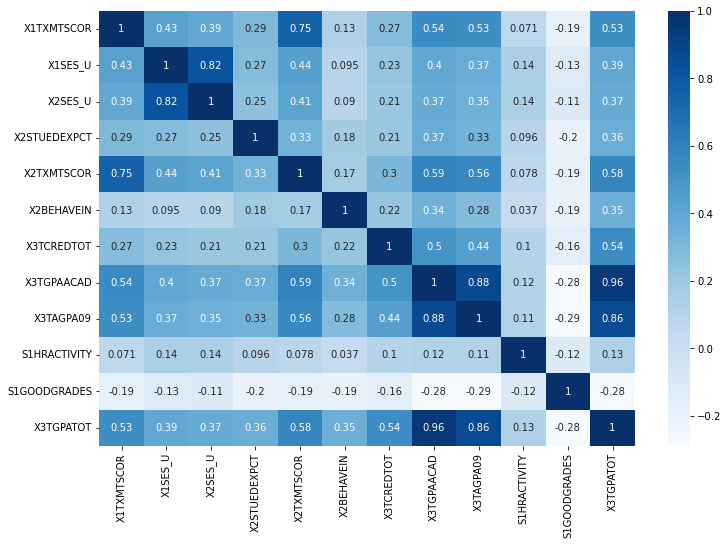

In [15]:
# Heatmap for Correlation
school_corr = df[['X1TXMTSCOR', 'X1SES_U', 'X2SES_U', 'X2STUEDEXPCT', 'X2TXMTSCOR', 'X2BEHAVEIN', 'X3TCREDTOT', 
                   'X3TGPAACAD', 'X3TAGPA09', 'S1HRACTIVITY', 'S1GOODGRADES', 'X3TGPATOT']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(school_corr, cmap="Blues", annot=True)

The GPA target is highly correlated with other GPA variables as expected. 

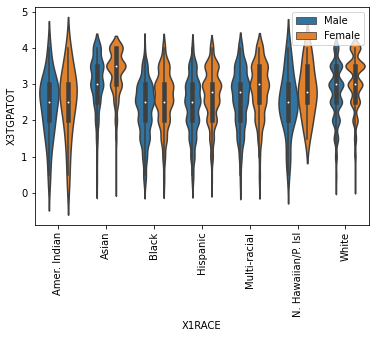

In [16]:
# Violin Plot for Sex and Race on GPA

v_plot = sns.violinplot(data=df, x='X1RACE', y='X3TGPATOT', hue='X1SEX')
leg = v_plot.legend()
leg.get_texts()[0].set_text('Male')
leg.get_texts()[1].set_text('Female')
v_plot.set_xticklabels(["Amer. Indian", "Asian", "Black", "Hispanic", "Multi-racial", "N. Hawaiian/P. Isl", "White"])
plt.xticks(rotation=90)
plt.show()

## Classification/Prediction Variables - Explaining Target Variables 

For the purposes of our initial analysis we look at:    
- X3EVERDROP - Binary variable indicating if the student ever dropped off or not.
- We will use this for classification purposed
- 0 = No known dropout episode; 1 = At least one known dropout episode
- X3TGPATOT - overall GPA of the student as of 2013 when a typical student would have graduated from High School

<AxesSubplot:xlabel='X3EVERDROP', ylabel='count'>

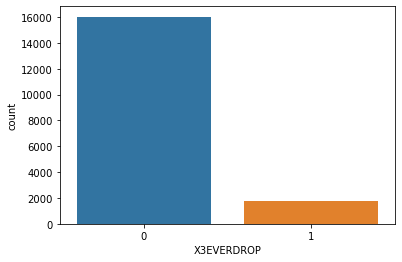

In [17]:
# we are generating count plot to see if the classe sizes are similar
sns.countplot(data=df, x='X3EVERDROP')

>We notice a huge class imbalance - hence we will perform resampling methods while doing the classification to generate efficient classifiers

<AxesSubplot:xlabel='X3TGPATOT', ylabel='X3EVERDROP'>

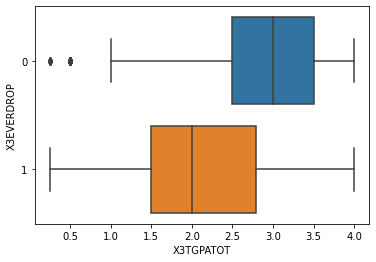

In [18]:
# we are generating histogram for the overall GPA continuous variable
sns.boxplot(data=df, x='X3TGPATOT', y='X3EVERDROP')

In [19]:
df['X3TGPATOT'].describe()

count    17762.00000
mean         2.80503
std          0.79517
min          0.25000
25%          2.50000
50%          3.00000
75%          3.50000
max          4.00000
Name: X3TGPATOT, dtype: float64

>The mean GPA is around 2.8 - just above average scores. As expected - individuals who never droped out score higher than those who had a history of droping out of school

## Project Questions

1. How can we identify the key factors that influence graduation rates in a high school setting using predictive machine learning techniques?
    - Target Variable: X3EVERDROP (Classification) and X3TGPATOT (Prediction)
    - Features: Student Demographic Characteristics, SES, High School Scores 
2. In what ways do certain communities and regions experience barriers to achieving educational attainment, and what steps can we take to address these disparities?
    - Target Variable: X3EVERDROP, X3TGPATOT
    - We will report how students belonging to different race communitues and socio-economic status face barriers to education by analyzing results of our shortlisted classification model(ie accuracy) and prediction model (ie precision and fit), for the above target variables 

## Pre-Liminary Test

In [20]:
seed = 4

In [21]:
# Removing X4 X5 Vars
x4x5 = []
for c in df.columns:
    if c[:2] == 'X4' or c[:2] == 'X5':
        x4x5.append(c)
df = df.drop(x4x5, axis=1)

Since both target variables are in X3, any variables in X4 and X5, which are taken after the X3 period, are irrelvant to predicting or classifying the target X3 values.

In [22]:
#Generating the list categorical variables in the new data frame
cat_type_x4x5 = []
for c in cat_type:
    if c[:2] == 'X4' or c[:2] == 'X5':
        cat_type_x4x5.append(c)
cat_type_x1x2x3 = list(set(cat_type)-set(cat_type_x4x5))
cat_type_x1x2x3 = list(set(cat_type_x1x2x3)-set(['X3EVERDROP']))
target_type = []

In [23]:
#Generating the list of numerical variables in the new data frame
cols = df.columns.tolist()
num_type_x1x2x3 = list(set(cols)-set(cat_type_x1x2x3)-set(['X3EVERDROP', 'X3TGPATOT', 'STU_ID', 'X2UNIV1', 'X2UNIV2A', 'X2UNIV2B', 
                                                           'X3UNIV1', 'W1STUDENT', 'W2STUDENT', 'W3STUDENT','X1TESTSTAT', 'X1SQSTAT', 
                                                           'X2TESTSTAT', 'X2SQSTAT', 'X3SQSTAT', 'W4STUDENT']))

In [24]:
#Generating dummies for all categorical variables
pd_dummy = pd.get_dummies(data=df[cat_type_x1x2x3])
df_new = pd.concat([df,pd_dummy],axis=1).drop(columns=cat_type_x1x2x3)

y = df_new['X3EVERDROP']
X = df_new.copy()
X = X.drop(['X3EVERDROP', 'X3TGPATOT', 'STU_ID', 'X2UNIV1', 'X2UNIV2A', 'X2UNIV2B', 'X3UNIV1', 'W1STUDENT', 'W2STUDENT', 'W3STUDENT',
           'X1TESTSTAT', 'X1SQSTAT', 'X2TESTSTAT', 'X2SQSTAT', 'X3SQSTAT', 'W4STUDENT'], axis=1)


#Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)


In [25]:
#standardising numerical variables in X_train 
scaler = StandardScaler()
scaler.fit_transform(X_train[list(set(num_type_x1x2x3)-set(['X3TGPATOT']))])


array([[-2.19095443,  0.04224816, -0.35739505, ...,  0.31176232,
         0.53384032, -2.01677551],
       [-1.54350548,  0.04224816,  2.46150665, ...,  0.31176232,
         0.53384032,  0.60417956],
       [ 1.04629034, -0.59451974, -1.06212047, ..., -2.31564009,
         0.53384032, -0.0828705 ],
       ...,
       [-0.24860757,  2.58931975, -1.06212047, ..., -0.21371816,
        -1.81566257, -0.75111448],
       [-0.24860757, -0.59451974,  0.34733038, ...,  0.31176232,
         0.53384032,  0.18121231],
       [-0.24860757, -0.59451974, -1.06212047, ..., -0.21371816,
        -0.64595297, -0.02111756]])

                          precision    recall  f1-score   support

       Never Dropped Out      0.932     0.984     0.957      4019
Dropped Out Atleast Once      0.675     0.320     0.434       422

                accuracy                          0.921      4441
               macro avg      0.804     0.652     0.696      4441
            weighted avg      0.908     0.921     0.908      4441



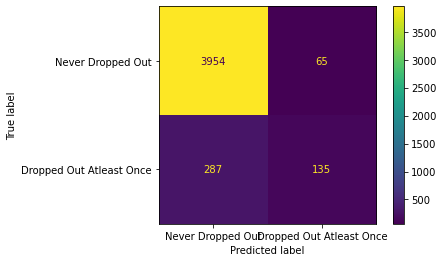

In [26]:
#logsitic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

cm_lr = confusion_matrix(y_test, lr_pred)
display_cm_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr,display_labels=['Never Dropped Out','Dropped Out Atleast Once'])
display_cm_lr.plot()


print(classification_report(y_test, lr_pred, digits=3, target_names=['Never Dropped Out','Dropped Out Atleast Once']))

As can be seen from classification report and confusion matrix display - the classifier is decent from 'Never Dropped Out' class, bu works terribly for 'Dropped out Atleast Once' class. Hence in later models we perform resampling and tuning to make our classifyer to have higher accuracy.

---
## Appendix

#### Student demographic charactersitics

In [27]:
df['X1SEX'].value_counts()

1    8908
2    8854
Name: X1SEX, dtype: int64

 1= Male
 2 = Female

In [28]:
df['X1RACE'].value_counts()

8    10006
4     2792
3     1802
6     1547
2     1414
1      117
7       84
Name: X1RACE, dtype: int64



1                   Amer. Indian/Alaska Native, non-Hispanic                  
2                   Asian, non-Hispanic                                     
3                   Black/African-American, non-Hispanic                    
4                   Hispanic, no race specified  and Hispanic, race specified                                                                   
6                   More than one race, non-Hispanic                        
7                   Native Hawaiian/Pacific Islander, non-Hispanic        
8                   White, non-Hispanic 

We only keep X1RACE as it provides us with all the information

#### Student Math scores

<AxesSubplot:xlabel='X1TXMTSCOR', ylabel='Count'>

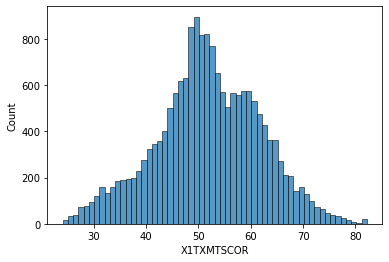

In [29]:
sns.histplot(data=df, x='X1TXMTSCOR')

<AxesSubplot:xlabel='X2TXMTSCOR', ylabel='Count'>

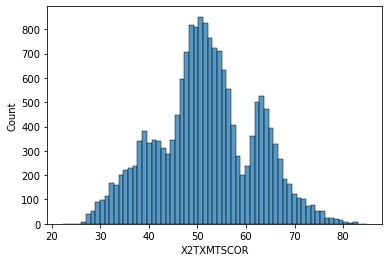

In [30]:
sns.histplot(data=df, x='X2TXMTSCOR')

We drop X1TXMTH and X2TXMTH because the standardised form of the score is a more readable column

#### Parent demographic characteristics

We notice that columns related to parents have many missing - as high as 40% are missing, hence we drop these columns

In [31]:
df['X1HHNUMBER'].value_counts()

4     6188
5     3998
3     3661
6     1753
2      964
7      674
8      306
9      119
10      55
11      44
Name: X1HHNUMBER, dtype: int64

In [32]:
df['X2HHNUMBER'].value_counts()

4     5458
3     4516
5     3533
6     1724
2     1343
7      686
8      283
9      118
10      53
11      48
Name: X2HHNUMBER, dtype: int64

We had quite a few number of missing in X1HHNUMBER - we impute these values from the later panel variable X2HHNUMBER. Since the time between the two panels is 3 years only 2009-2012, we don't expect much changes in the HH numbers

#### Family economic and socio economic characteristics

<AxesSubplot:xlabel='X1SES_U', ylabel='Count'>

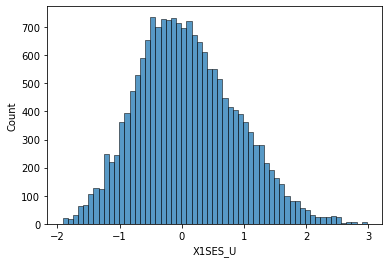

In [33]:
sns.histplot(data=df, x='X1SES_U')

<AxesSubplot:xlabel='X2SES_U', ylabel='Count'>

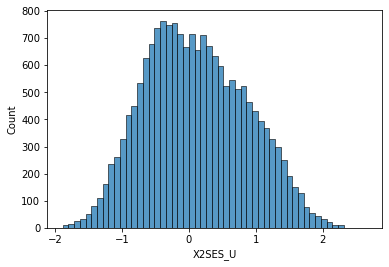

In [34]:
sns.histplot(data=df, x='X2SES_U')

The SES [SES_U] provide a single value taking the average calculated using parent/guardians' education (X1PAR1EDU and X1PAR2EDU), occupation (X1PAR1OCC2 and X1PAR2OCC2), family income (X1FAMINCOME) and [school urbanicity (X1LOCALE)]

Since parent characteristics info and economic measures are included in SES_U we drop other variables including poverty variable as it is correlated to family income

#### Perception of student occupation at age 30

In [35]:
l = ['X1STU30OCC_STEM1']
for i in l:    
    print(df[i].value_counts())
    print('\n')

0     11456
4      3690
1      1472
-8      539
5       357
6       248
Name: X1STU30OCC_STEM1, dtype: int64




In [36]:
l = [ 'X2STU30OCC_STEM1']
for i in l:    
    print(df[i].value_counts())
    print('\n')

0     11120
4      4050
1      1654
5       528
-8      361
6        49
Name: X2STU30OCC_STEM1, dtype: int64




We are dropping the X1STU30OCC2 (X2STU30OCC2 for later panel) variable and instead keeping the X1STU30OCC_STEM1 (X2STU30OCC_STEM1 for later panel) variable. The former gives a list of all the various groups of industries that the child sees themselves in at age 30 - however, to make the analysis more specific, for the study we are interested in how their perception of being in a STEM industry affects graduation rate.

#### School charcteristics

In [37]:
l = ['X1CONTROL', 'X1LOCALE', 'X1REGION']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    14418
2     3344
Name: X1CONTROL, dtype: int64


2    6279
1    5027
4    4306
3    2150
Name: X1LOCALE, dtype: int64


3    7238
2    4789
4    2965
1    2770
Name: X1REGION, dtype: int64




In [38]:
l = ['X2CONTROL', 'X2LOCALE', 'X2REGION']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    14703
2     3059
Name: X2CONTROL, dtype: int64


2    5304
4    5193
1    4971
3    2294
Name: X2LOCALE, dtype: int64


3    7262
2    4774
4    2958
1    2768
Name: X2REGION, dtype: int64




In [39]:
l = ['X3CONTROL', 'X3LOCALE', 'X3REGION']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    14728
2     3034
Name: X3CONTROL, dtype: int64


2    5338
4    5157
1    4971
3    2296
Name: X3LOCALE, dtype: int64


3    7260
2    4780
4    2958
1    2764
Name: X3REGION, dtype: int64




CONTROL, LOCALE and REGION are variables giving information about the school location attended by the students. For the missing in later panel variables we impute from the base year data.

#### Student enrollment status

In [40]:
l = ['X2ENROLSTAT', 'X2EVERDROP', 'X2DROPSTAT']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    14958
2     2103
5      353
3      194
4      154
Name: X2ENROLSTAT, dtype: int64


0    16351
1     1411
Name: X2EVERDROP, dtype: int64


0    16351
3      942
1      353
2      116
Name: X2DROPSTAT, dtype: int64




'X2ENROLSTAT', 'X2ENRSTATSCH' are enrollment status at 2012 when most sample will be in the spring semester of their 11th grade. Of these two, X2ENROLSTAT is most comprehensive so retaining that.

'X2EVERDROP', 'X2DROPSTAT' provide status of dropout in spring 2012. Of these two X2DROPSTAT is most comprehensive. However, we will still retain X2EVERDROP as it is a binary binary variable indicating if the student has ever dropped out which is useful in classification

In [41]:
l = ['X3DROPOUTTIME', 'X3DROPSTAT', 'X3EVERDROP']
for i in l:
    print(df[i].value_counts())
    print('\n')

0     14202
-8     2770
7       273
8       196
4       186
1       135
Name: X3DROPOUTTIME, dtype: int64


0     12933
-8     3271
3       737
1       451
2       370
Name: X3DROPSTAT, dtype: int64


0    16020
1     1742
Name: X3EVERDROP, dtype: int64




X3DROPOUTTIME tells the years when the student dropped out as of 2013, with missing as -8 and -9. Relabelling -8 and -9 for 'unknown'.
X3DROPSTAT tells more details about the dropout status as of 2013 (with 4 being unknown and -8 as missing). Convert 4 to -8 to relabel as 'unknown'. 
EVERDROP is binary - dropping out or not as of 2013. This is retained as it is

#### Parent relation information

As we have done before - we are dropping this variable about parents which tells if the parent is the same across different panels. Since there are a lot of missing and we can't impute from other colums. Additionally the SES_U variables anyway capture information about parents education, occupation etc.

#### Number of High Schools

This variable gives us the number of highschools attended by student by spring of 2012

In [42]:
df['X2NUMHS'].value_counts()

1    15007
2     2308
3      404
4       43
Name: X2NUMHS, dtype: int64

#### University information

In [43]:
l =['X3PROGLEVEL', 'X3CLGANDWORK']
for i in l:
    print(df[i].value_counts())
    print('\n')

1     5708
-6    3809
-8    3769
2     2940
5      573
4      422
3      340
6      201
Name: X3PROGLEVEL, dtype: int64


-8    5934
1     5348
2     4065
3     1821
4      594
Name: X3CLGANDWORK, dtype: int64




X3PROGLEVEL - tells the program levels taken by somone in in college as of 2013. 7, -8 and -9 means information is not available - recategorising these into unknown (replacing 7 and -9 with -8). -7 means N/A - retaining as it is.

X3CLGANDWORK - gives information about whether the individual is at college or working or both. -8 means information not available, hence recategorising 5 - not known or undecided as -8 as well. 

#### GED 

In [44]:
l = ['X3EVERGED']
for i in l:
    print(df[i].value_counts())
    print('\n')

0    17380
1      382
Name: X3EVERGED, dtype: int64




X3EVERGED - tells if the if the student received a GED or its equivalent. 
X3GEDPASSED - is aboout GED alone and there are many missing or NA - hence dropping

#### High school completion

In [45]:
l = ['X3HSCOMPSTAT']
for i in l:
    print(df[i].value_counts())
    print('\n')

1    15661
5      738
4      502
3      465
2      396
Name: X3HSCOMPSTAT, dtype: int64




X3HSCOMPSTAT provides information HS completion status as of 2013 using transcript, GED, etc data. Similarly X3TOUTCOME also provides HS completion which more comprehensive categries. However, since there are missing in these we keep H3HSCOMPSTAT

#### English language

In [46]:
l = ['X3ELLSTATUS']
for i in l:
    print(df[i].value_counts())
    print('\n')

0     16624
-8      837
1       301
Name: X3ELLSTATUS, dtype: int64




---

## REFERENCES 

1. EDA Lecture 3 - Data Wrangling
2. https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/#
3. https://seaborn.pydata.org/generated/seaborn.heatmap.html
4. https://seaborn.pydata.org/generated/seaborn.violinplot.html
5. https://seaborn.pydata.org/generated/seaborn.catplot.html
6. https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/
7. https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html 
8. Exploratory Data Analysis Coursework Notes
9. Machine Learning Lecture Slides 
10. Machine Learning Lab 3,4
11. Split-apply-combine cheetsheet